<a href="https://colab.research.google.com/github/lohan20s/CNN_Cats_Dogs_fcc/blob/main/fcc_cat_dog_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3: Read/decode the images

train_image_generator = ImageDataGenerator(rescale=1./255) #rescale images from 0 to 255 to 0 to 1
validation_image_generator = ImageDataGenerator(rescale=1./255) #rescale images from 0 to 255 to 0 to 1
test_image_generator = ImageDataGenerator(rescale=1./255) #rescale images from 0 to 255 to 0 to 1

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='binary', shuffle=True)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='binary', shuffle=True)
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode= 'binary',classes=['.'],shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


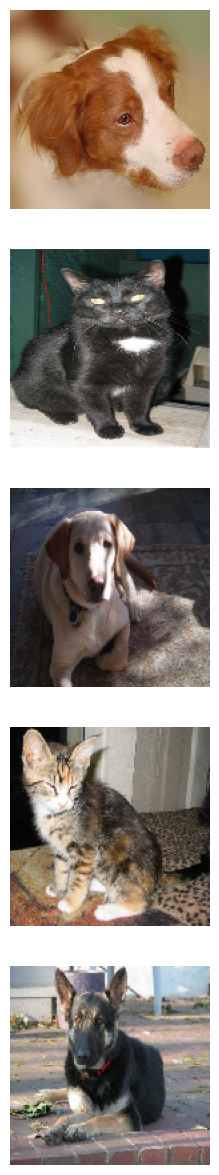

In [ ]:
# 4 Plot a subsample of images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)

plotImages(sample_training_images[:5])


In [ ]:
# 5 Augment the number of images in the training dataset by creating a new imagegenerator
train_image_generator =  ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',rescale=1./255)

Found 2000 images belonging to 2 classes.


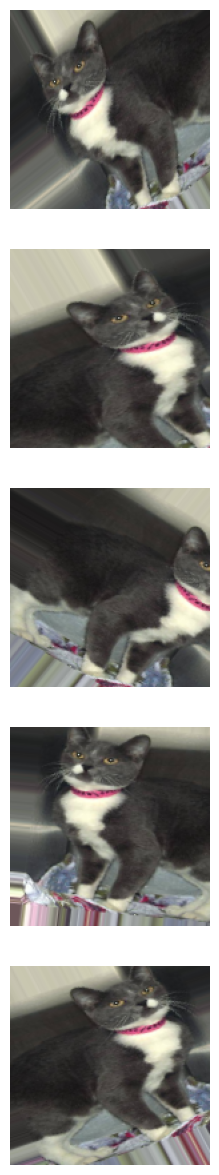

In [ ]:
# 6 generate augmented images from the new imagegenerator
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# 7 create a model for the neural network that outputs class probabilities, using a stack of Conv2D and MaxPooling2D layers and then a fully connected layer
# on top that is activated by a ReLU activation function. Compile the model passing the arguments to set the optimizer and loss. Also pass in
#metrics=['accuracy'] to view training and validation accuracy for each training epoch.
model = Sequential()

#add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))

#add dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 294,081 (1.12 MB)

 Trainable params: 294,081 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs,
#validation_data, and validation_steps.
history = model.fit(train_data_gen, epochs=epochs,
                    validation_data=val_data_gen)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5046 - loss: 0.6915

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 122s 8s/step - accuracy: 0.5055 - loss: 0.6913 - val_accuracy: 0.6130 - val_loss: 0.6733
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 113s 7s/step - accuracy: 0.5833 - loss: 0.6724 - val_accuracy: 0.5990 - val_loss: 0.6485
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.6134 - loss: 0.6599 - val_accuracy: 0.6610 - val_loss: 0.6160
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 110s 7s/step - accuracy: 0.6275 - loss: 0.6393 - val_accuracy: 0.6660 - val_loss: 0.6224
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 113s 7s/step - accuracy: 0.6266 - loss: 0.6295 - val_accuracy: 0.6760 - val_loss: 0.6113
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.6713 - loss: 0.6105 - val_accuracy: 0.6390 - val_loss: 0.6242
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.6847 - loss: 0.6040 - val_accuracy: 0.6760 - val_loss: 0.5986
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.6578 - loss: 0.6086 - val_accuracy: 0.6590 - val_loss: 0.

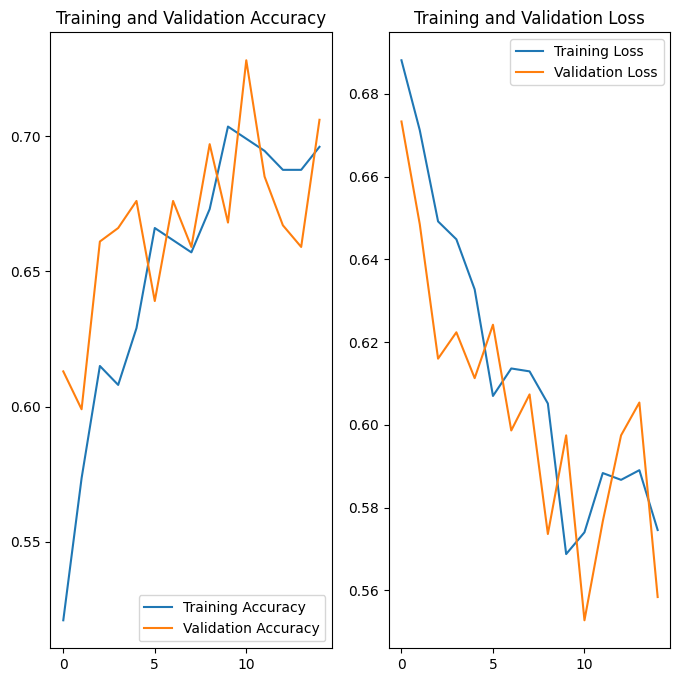

In [ ]:
# 9 Visualize the accuracy and loss of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


<ipython-input-5-b72e6970720f>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % (probability*100) + "% dog")
<ipython-input-5-b72e6970720f>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % ((1-probability)*100) + "% cat")


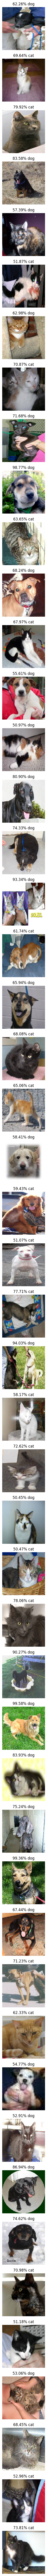

In [ ]:
# 10: prediction, get the probability that each test image is a dog or a cat. Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

probabilities = model.predict(test_data_gen)
plotImages(test_data_gen[0][0], probabilities)


In [ ]:
# 11: determine if you passed the challenge
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
